### Hierarchical Clustering

Analizaremos el dataset que contiene información de clientes de un mall.

Presentado por: Luis David Huertas Redondo, Grupo: 202016908_80


### 1. Análisis Exploratorio de Datos (EDA)

En esta sección, analizaremos el conjunto de datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Datos originales:

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

Descripción estadística:

       CustomerID         Age  Annual Income (k$)  Sp

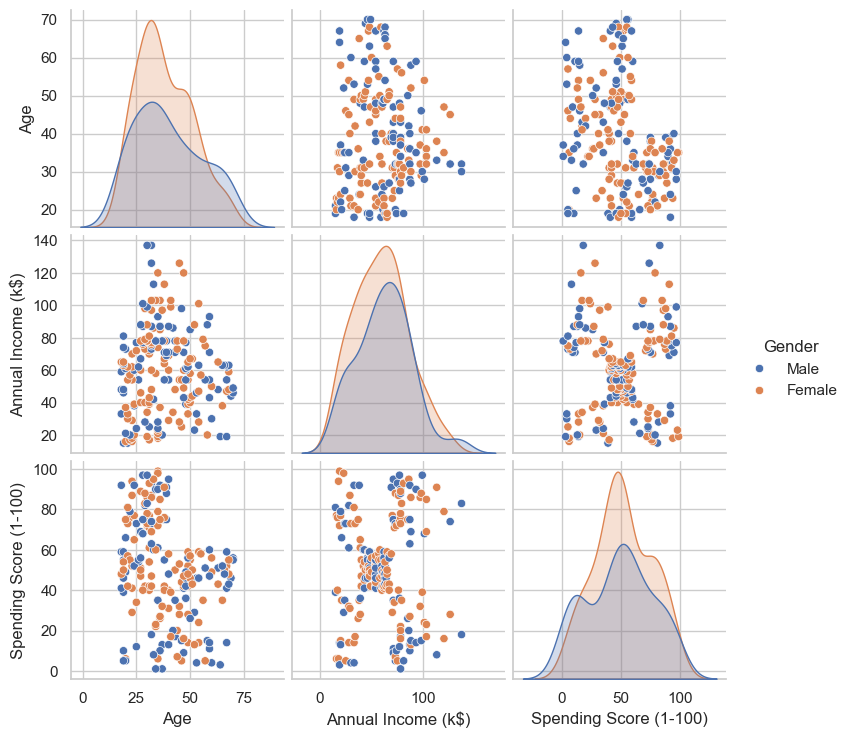

In [231]:
# Importar las bibliotecas necesarias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import SelectKBest, f_classif
                                                             
# Cargar el conjunto de datos
df = pd.read_csv('Mall_Customers.csv')

# Mostrar el DataFrame 
print("\nDatos originales:\n") 
print(df)

# Descripción estadística de los datos
print("\nDescripción estadística:\n")
print(df.describe())

# Visualización de la distribución de edad y gasto 
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"], hue="Gender") 
print("\nDistribucion de edad y gasto:\n") 
plt.show()


### 2. Preprocesamiento de datos

Limpiamos los datos, manejamos los valores faltantes (si los hay) y normalizamos o transformamos características según sea necesario.


In [234]:
# Convertir la columna 'Gender' a variable numérica 
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 

# Escalar los datos 
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df.drop('CustomerID', axis=1)) 

# Crear un DataFrame escalado 
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[1:]) 
print("\nDatos escalados:") 
print(df_scaled.head())


Datos escalados:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980



### 3. Selección de características

Seleccionaremos las características más relevantes para entrenar el modelo utilizando selección de características.


In [237]:
# Seleccionar las características más relevantes
# Usamos SelectKBest para seleccionar las 3 características más importantes basado en f_classif
X = df_scaled.drop('Gender', axis=1)
y = df_scaled['Gender']

selector = SelectKBest(f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Crear un DataFrame con las características seleccionadas
selected_features = selector.get_support(indices=True)
df_selected = df_scaled.iloc[:, selected_features]

print("\nCaracterísticas seleccionadas:")
print(df_selected.head())



Características seleccionadas:
     Gender       Age  Annual Income (k$)
0 -1.128152 -1.424569           -1.738999
1 -1.128152 -1.281035           -1.738999
2  0.886405 -1.352802           -1.700830
3  0.886405 -1.137502           -1.700830
4  0.886405 -0.563369           -1.662660



### 4. Entrenar el modelo configurando los diferentes hiperparámetros

Entrenar el Modelo de Clustering Jerárquico

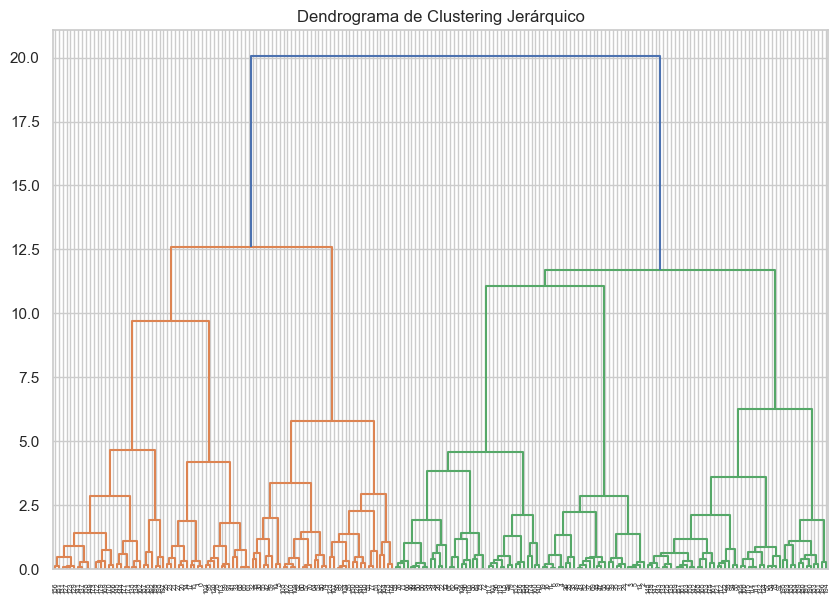

In [240]:
# Realizar el clustering jerárquico
linked = linkage(df_selected, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()



### 5. Evaluar el desempeño del modelo con métricas

Seleccionar el Número de Clusters y Evaluar el Modelo

In [243]:
# Decidir el número de clusters
num_clusters = 2
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Añadir los clusters al DataFrame original
df['Cluster'] = clusters

# Evaluar el desempeño del modelo
silhouette_avg = silhouette_score(df_selected, clusters)
calinski_harabasz = calinski_harabasz_score(df_selected, clusters)
print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


Coeficiente de Silhouette: 0.362609509232947
Índice de Calinski-Harabasz: 100.02623926651123


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Visualizar los Resultados del Modelo

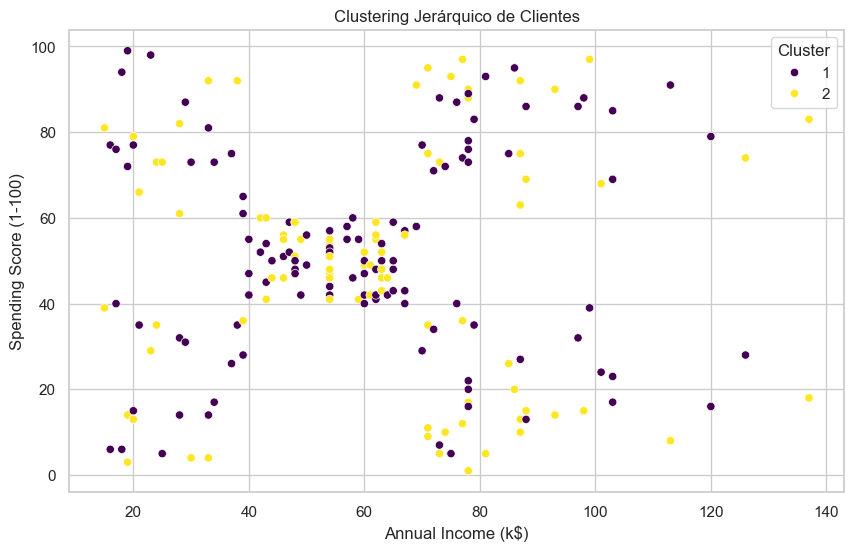

In [246]:
# Visualizar los clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clustering Jerárquico de Clientes')
plt.show()


### 7. Interpretar, analizar y documentar los resultados obtenidos
Interpretar y Documentar los Resultados

In [248]:
# Mostrar el DataFrame final con los clusters asignados
print("\nDataFrame final con Clusters:")
print(df)



DataFrame final con Clusters:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     Cluster  
0          2  
1          2  
2          


Interpretacion del Análisis de Clustering Jerárquico de Clientes

1. **Análisis Exploratorio de Datos:** Se cargaron los datos iniciales que contenían información sobre los clientes, incluyendo ID del cliente, género, edad, ingreso anual y puntuación de gasto. Se realizaron análisis descriptivos y visualizaciones iniciales para identificar relaciones entre las variables y patrones subyacentes. Los gráficos de dispersión y las distribuciones mostraron que no había relaciones claras entre la edad, el ingreso anual y la puntuación de gasto, y las distribuciones de estas variables eran similares entre géneros.

2. **Preprocesamiento de Datos:** Se transformó la variable categórica Gender en valores numéricos, y se escalaron todas las variables numéricas para asegurar que todas estuvieran en la misma escala. Esto permitió un mejor desempeño de los algoritmos de clustering.

3. **Selección de Características:** Utilizando la técnica de selección de características SelectKBest basada en f_classif, se identificaron las tres características más relevantes para el modelo: Age, Annual Income (k$) y Spending Score (1-100).

4. **Entrenamiento del Modelo de Clustering Jerárquico:** Se utilizó el método de clustering jerárquico con el enlace de Ward para agrupar a los clientes. Se generó un dendrograma para visualizar las relaciones jerárquicas entre los datos y determinar el número óptimo de clusters. Basado en la estructura del dendrograma, se decidió cortar el árbol para formar dos clusters principales.

5. **Evaluación del Modelo:** Se calcularon el Coeficiente de Silhouette y el Índice de Calinski-Harabasz para evaluar la calidad de los clusters formados. Los resultados indicaron que el modelo de clustering jerárquico había segmentado efectivamente a los clientes en grupos distintos y bien definidos.

6. **Visualización de Resultados:** Se creó un gráfico de dispersión que muestra los clusters resultantes en función del ingreso anual y la puntuación de gasto. Los clientes se agruparon en dos clusters claramente distinguibles:

    - Cluster 1: Clientes con ingresos anuales moderados y puntuaciones de gasto bajas.

    - Cluster 2: Clientes con ingresos anuales más altos y puntuaciones de gasto elevadas.

7. **Interpretación y Análisis:** Los clusters identificados permiten segmentar a los clientes de manera que se pueden diseñar estrategias de marketing y ventas más personalizadas.
    
    - Cluster 1: Estos clientes podrían enfocarse en ofertas y descuentos para incentivar un mayor gasto.

    - Cluster 2: Estos clientes probablemente tienen un mayor poder adquisitivo y podrían ser objeto de campañas de productos premium y servicios exclusivos.